## Getting the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Install Kaggle For Datasets

!pip install -q kaggle

In [ ]:
# Uploading the json file that contains the username & password for your API token of kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"surajsharma03","key":"940026291b8ae93a9b46308ad7aa3fa1"}'}

In [ ]:
# Create a kaggle directory

# !mkdir ~/.kaggle

!mkdir -p /root/.kaggle


# The -p flag with mkdir ensures that the directory is created only if it doesn't already exist, and it creates any necessary parent directories as well.

In [ ]:
# Copying kaggle.json to the kaggle folder

!cp kaggle.json /root/.kaggle/

In [ ]:
# Changing the permissions for the kaggle.json file

!chmod 600 /root/.kaggle/kaggle.json

''' chmod is the command to change permissions.
600 is the permission code. It breaks down into three parts:
The first digit (6) specifies the permissions for the file owner (you). It means read and write access (4 + 2).
The second digit (0) specifies the permissions for the group.
The third digit (0) specifies the permissions for others. '''


' chmod is the command to change permissions.\n600 is the permission code. It breaks down into three parts:\nThe first digit (6) specifies the permissions for the file owner (you). It means read and write access (4 + 2).\nThe second digit (0) specifies the permissions for the group.\nThe third digit (0) specifies the permissions for others. '

In [ ]:
# Listing all the kaggle datasets

! kaggle datasets list

ref                                                             title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/global-youtube-statistics-2023                 Global YouTube Statistics 2023                       60KB  2023-07-28 15:36:38          14171        471  1.0              
nelgiriyewithana/top-spotify-songs-2023                         Most Streamed Spotify Songs 2023                     47KB  2023-08-26 11:04:57           3249        112  1.0              
joebeachcapital/linkedin-jobs                                   LinkedIn Tech Jobs                                   12KB  2023-08-29 07:15:02            840         28  1.0              
iamsouravbanerjee/airline-dataset                           

In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset

100% 2.69G/2.70G [00:29<00:00, 205MB/s]
100% 2.70G/2.70G [00:30<00:00, 96.6MB/s]


## Copying the downloaded New Plant Diseases Dataset to the Project folder in Drive

In [ ]:
from shutil import copyfile
from google.colab import drive

# Define the source and destination paths
source_path = '/content/new-plant-diseases-dataset.zip'
destination_path = '/content/drive/MyDrive/Crop Health Monitoring (Project Code)/Dataset/new-plant-diseases-dataset.zip'

# Copy the dataset to Google Drive
copyfile(source_path, destination_path)


'/content/drive/MyDrive/Soham Jariwala - Crop Health Monitoring (Project Code & Research Paper)/Dataset/new-plant-diseases-dataset.zip'

In [ ]:
!unzip /content/new-plant-diseases-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 

## For copying the extracted dataset into the project folder

In [ ]:
import shutil

# Define source and destination paths
source_directory = '/content/new plant diseases dataset(augmented)'
destination_directory = '/content/drive/MyDrive/Crop Health Monitoring (Project Code)/Dataset/new plant diseases dataset(augmented)'

# Copy the entire directory to Google Drive
shutil.copytree(source_directory, destination_directory)


## Crop Health Monitoring Project

In [ ]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import keras
print("Keras version:", keras.__version__)


TensorFlow version: 2.12.0
Keras version: 2.12.0


In [ ]:
# Importing Image Data Generator from Keras which is in Tensorflow

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# ImageDataGenerator: ImageDataGenerator is a class provided by Keras that generates batches of image data with real-time data augmentation during training. It allows you to preprocess and augment images on-the-fly as you feed them into a neural network during training.

# img_to_array: img_to_array is a function that converts an image (PIL image) into a NumPy array. This is useful when you want to convert images into arrays that can be fed into machine learning models.

# load_img: load_img is a function that loads an image file as a PIL image. PIL (Python Imaging Library) is a library for opening, manipulating, and saving various image file formats.


In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions


- from tensorflow.keras.applications.vgg19: This part specifies the module you're importing from. In this case, you're importing from the VGG19 application module provided by TensorFlow's Keras library. The applications submodule contains pre-built models that are commonly used for various machine learning tasks.

- VGG19: VGG19 is a class within the tensorflow.keras.applications.vgg19 module. It represents the VGG19 convolutional neural network architecture, which is widely used for image classification tasks. You can use this class to create an instance of the VGG19 model and use it for various image-related tasks.

- preprocess_input: preprocess_input is a function within the tensorflow.keras.applications.vgg19 module. It's used to preprocess input images before feeding them into the VGG19 model. The preprocessing typically involves scaling pixel values and converting the image to a format suitable for the model's input.

- decode_predictions: decode_predictions is another function within the tensorflow.keras.applications.vgg19 module. After running an image through the VGG19 model, the output is a set of predictions, often represented as probabilities for different classes. The decode_predictions function helps convert these probabilities back into human-readable labels, often with class names associated with the predictions.

## Exploratory Data Analysis

In [ ]:
# Checking the number of classes

len(os.listdir("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"))

38

In [ ]:
# Checking the names of the classes

os.listdir("/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train")

['Potato___healthy',
 'Strawberry___Leaf_scorch',
 'Grape___healthy',
 'Blueberry___healthy',
 'Peach___Bacterial_spot',
 'Grape___Black_rot',
 'Strawberry___healthy',
 'Grape___Esca_(Black_Measles)',
 'Apple___Cedar_apple_rust',
 'Apple___Apple_scab',
 'Tomato___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Target_Spot',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Potato___Late_blight',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___Late_blight',
 'Corn_(maize)___healthy',
 'Potato___Early_blight',
 'Cherry_(including_sour)___healthy',
 'Peach___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Soybean___healthy',
 'Corn_(maize)___Common_rust_',
 'Apple___healthy',
 'Raspberry___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Leaf_Mold',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Cherry_(including_sour)___Powdery_mildew',
 'Tomato___Early_blight',
 'Apple

## Data Augmentation

#### Data augmentation is the process of creating new training data by applying various transformations, like flips, rotations, shifts, and more, to the original dataset. This technique enhances dataset diversity, improving model performance and generalization without needing additional real data.

    Some common augmentation techniques include:

- Horizontal Flipping: Flipping images horizontally, which is useful for tasks where the orientation of objects doesn't affect their interpretation.

- Vertical Flipping: Flipping images vertically, often used for images with vertical symmetry.

- Rotation: Rotating images by a certain angle, helping the model handle different object orientations.

- Shift: Shifting images horizontally or vertically to simulate different viewpoints or object positions.

- Zooming: Zooming in or out of images, providing variations in object scale.

- Brightness and Contrast Adjustments: Changing the brightness and contrast of images, simulating changes in lighting conditions.

- Color Jittering: Slight variations in color balance to account for different lighting conditions.

- Noise Addition: Adding small amounts of noise to images to improve robustness to noise in real-world data.

- Cropping and Resizing: Cropping and resizing images to focus on specific regions of interest.

    Data augmentation is especially valuable when the original dataset is limited or when the distribution of classes is imbalanced. By creating augmented versions of the data, the model becomes more resistant to overfitting and better adapts to variations in real-world data.

#### ImageDataGenerator is a tool in TensorFlow's Keras that automates image data preprocessing and augmentation during training. It generates augmented images on-the-fly, helping to enhance model performance by providing more varied training examples and preventing overfitting. This process is memory-efficient and seamlessly integrates with the training process. It's particularly useful for training deep learning models on image data.

- Memory Efficiency : Storing augmented images in memory can consume a significant amount of space, especially when dealing with a large dataset. ImageDataGenerator applies augmentations on-the-fly during training, which means that only the original images are stored in memory, and the augmentations are applied dynamically as the data is fed into the model.

In [ ]:
train_datagen = ImageDataGenerator(zoom_range = 0.5, shear_range = 0.3, horizontal_flip = True, preprocessing_function = preprocess_input)

val_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

## Preprocessing the data

In [ ]:
train = train_datagen.flow_from_directory(directory = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                          target_size = (256, 256),
                                          batch_size = 32)

val = val_datagen.flow_from_directory(directory = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                          target_size = (256, 256),
                                          batch_size = 32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
t_img, label = train.next()

# The line t_img, label = train.next() fetches the next batch of images and their corresponding labels from the train data generator. These batches are typically used for training machine learning models, such as convolutional neural networks (CNNs), on tasks like image classification.

# train.next() is a method call on the train data generator. This method is used to retrieve the next batch of data from the generator. In the context of image data, a batch would typically consist of a batch of images and their corresponding labels.

In [ ]:
t_img

array([[[[  20.060997 ,   -6.7789993,  -11.68     ],
         [  20.060997 ,   -6.7789993,  -11.68     ],
         [  20.060997 ,   -6.7789993,  -11.68     ],
         ...,
         [  28.060997 ,   -1.7789993,   -5.6800003],
         [  28.060997 ,   -1.7789993,   -5.6800003],
         [  28.060997 ,   -1.7789993,   -5.6800003]],

        [[  20.060997 ,   -6.7789993,  -11.68     ],
         [  20.060997 ,   -6.7789993,  -11.68     ],
         [  20.060997 ,   -6.7789993,  -11.68     ],
         ...,
         [  28.060997 ,   -1.7789993,   -5.6800003],
         [  28.060997 ,   -1.7789993,   -5.6800003],
         [  28.060997 ,   -1.7789993,   -5.6800003]],

        [[  20.060997 ,   -6.7789993,  -11.68     ],
         [  20.060997 ,   -6.7789993,  -11.68     ],
         [  20.060997 ,   -6.7789993,  -11.68     ],
         ...,
         [  28.060997 ,   -1.7789993,   -5.6800003],
         [  28.060997 ,   -1.7789993,   -5.6800003],
         [  28.060997 ,   -1.7789993,   -5.6800003]],

In [ ]:
t_img.shape

(32, 256, 256, 3)

In [ ]:
def plotImage(img_arr, label):
  for img, label in zip(img_arr, label):
    plt.figure(figsize = (5,5))
    # plt.imshow(img)
    plt.imshow(img/255)
    plt.show()

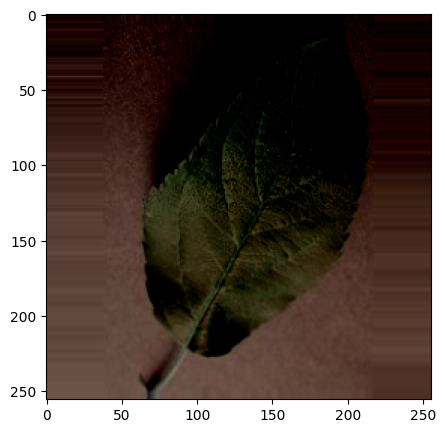

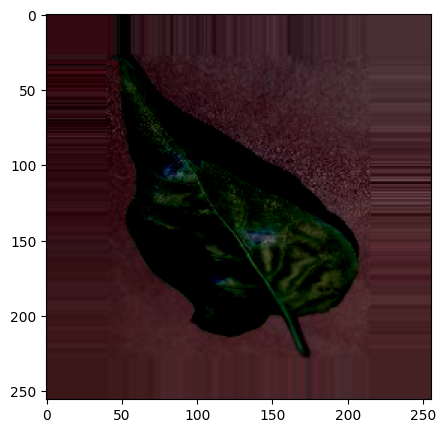

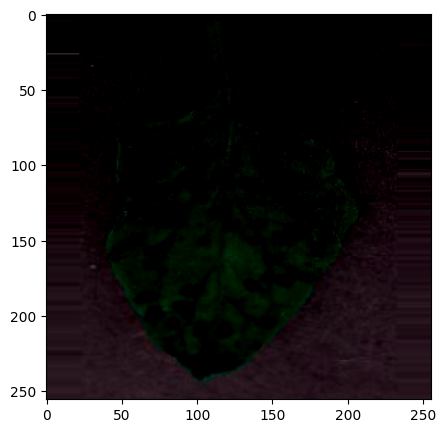

In [ ]:
plotImage(t_img[:3], label[:3])

In [ ]:
v_img, label = val.next()

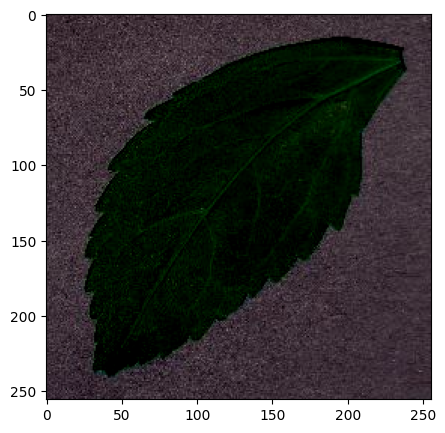

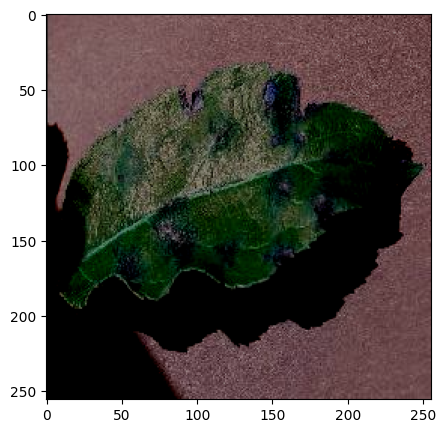

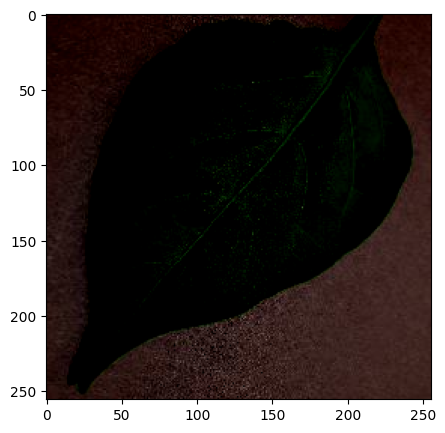

In [ ]:
plotImage(v_img[:3], label[:3])

## Creating the Model

In [ ]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape = (256, 256, 3), include_top = False)

# the input shape you've provided, (256, 256, 3), is a common choice for image classification tasks

# This code initializes a VGG19 model with the specified input shape (256, 256, 3) and excludes the top layers (fully connected layers) by setting include_top to False.

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
# Transfer Learning, we are not training the model again

for layer in base_model.layers:
  layer.trainable = False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
X = Flatten()(base_model.output) # creating a Flatten layer which takes the output of the base_model as input

X = Dense(units = 38, activation = 'softmax')(X) # takes the output of the Flatten layer, the number of units is equal to the number of classes in our dataset


In [ ]:
# creating our model

model = Model(base_model.input, X)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
model.compile(optimizer = 'adam', loss = keras.losses.categorical_crossentropy, metrics = ['accuracy'])

## Early stopping & Model check point

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# Early Stopping

es = EarlyStopping(monitor = 'val_accuracy', min_delta = 0.01, patience = 3, verbose = 1)

# Model Check Point

mc = ModelCheckpoint(filepath = 'best_model.h5',
                     monitor = 'val_accuracy',
                     min_delta = 0.01,
                     patience = 3,
                     verbose = 1,
                     save_best_only = True)

# Callback

cb = [es, mc]

In [ ]:
his = model.fit_generator(train,
                          steps_per_epoch = 16,
                          epochs = 50,
                          verbose = 1,
                          callbacks = cb,
                          validation_data = val,
                          validation_steps = 16)

<ipython-input-39-c9c766f1a0f7>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train,


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 26.7647 - accuracy: 0.1738
Epoch 1: val_accuracy improved from -inf to 0.39844, saving model to best_model.h5
16/16 [==============================] - 31s 1s/step - loss: 26.7647 - accuracy: 0.1738 - val_loss: 16.1314 - val_accuracy: 0.3984
Epoch 2/50
16/16 [==============================] - ETA: 0s - loss: 14.7818 - accuracy: 0.4004
Epoch 2: val_accuracy improved from 0.39844 to 0.55469, saving model to best_model.h5
16/16 [==============================] - 16s 990ms/step - loss: 14.7818 - accuracy: 0.4004 - val_loss: 9.0982 - val_accuracy: 0.5547
Epoch 3/50
16/16 [==============================] - ETA: 0s - loss: 11.4102 - accuracy: 0.5215
Epoch 3: val_accuracy improved from 0.55469 to 0.69141, saving model to best_model.h5
16/16 [==============================] - 16s 996ms/step - loss: 11.4102 - accuracy: 0.5215 - val_loss: 6.5339 - val_accuracy: 0.6914
Epoch 4/50
16/16 [==============================] - ETA: 0s - l

#### while the model is getting trained, if the gap between the accuracy & val_accuracy is high, that means the model is overfitting

In [ ]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

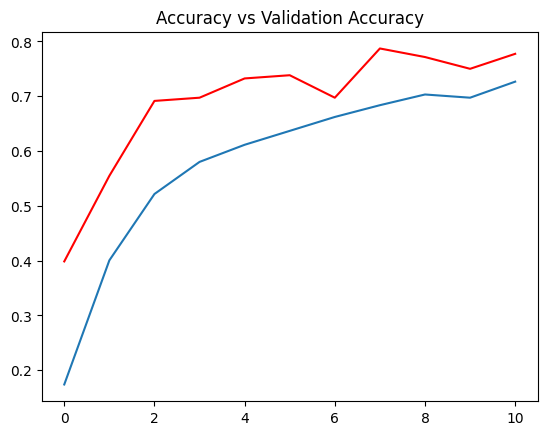

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c = 'red')
plt.title('Accuracy vs Validation Accuracy')
plt.show()

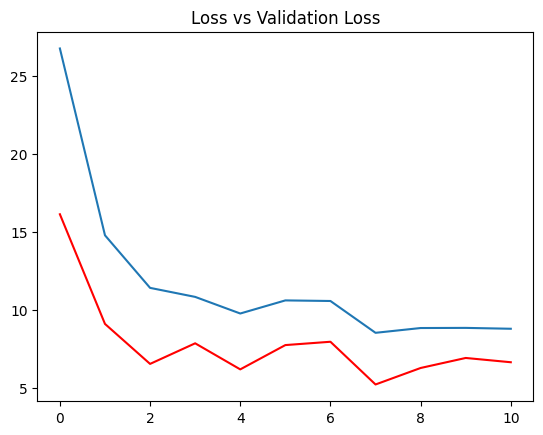

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = 'red')
plt.title('Loss vs Validation Loss')
plt.show()

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('/content/best_model.h5')

In [ ]:
acc = model.evaluate_generator(val)[1]
print(f"The accuracy of the model is {acc * 100} %")

<ipython-input-45-680dcd0598bf>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc = model.evaluate_generator(val)[1]


The accuracy of the model is 76.46255493164062 %


## Testing the model on unseen data

In [ ]:
train.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [ ]:
class_names_nums = zip(list(train.class_indices.values()), list(train.class_indices.keys()))

print(type(class_names_nums))

<class 'zip'>


In [ ]:
classes_dict = dict(zip(list(train.class_indices.values()), list(train.class_indices.keys())))

# here we are accessing all the class names which are keys in class_indices of train & converting them into a list
# and we are also accessing the class numerical label for all the class names which are values in class_indices of train & converting them into a list
# In Python, the zip function is used to combine two or more iterable objects (e.g., lists, tuples, or other sequences) element-wise. It creates an iterator that generates tuples where the first item in each passed iterator is paired together, the second item in each passed iterator is paired together, and so on. If the input iterables are of different lengths, zip stops creating tuples when the shortest input iterable is exhausted.
# zip function combines the 2 lists & then using dict function we convert the combined list into a dictionary which we store in the classes_dict variable

In [ ]:
classes_dict

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [ ]:


def prediction(path):
  img = load_img(path, target_size = (256, 256))
  img_arr = img_to_array(img)
  processed_img_arr = preprocess_input(img_arr)
  # print(processed_img_arr) # prints the array obtained after passing the image array to the preprocess_input function
  # print("The shape of the processed image array is ", processed_img_arr.shape)  # prints the shape of the array obtained after passing the image array to the preprocess_input function

  img_exp_dim = np.expand_dims(processed_img_arr, axis = 0)
  # print("The shape of the processed image array after expanding it's dimension is ", img_exp_dim.shape)
  # prints the shape of the array obtained after passing the processed image array to the expand_dims function which basically expands the dimension of the image from 3D to 4D

  # Passing the image to the model for making predictions
  # pred = model.predict(img_exp_dim) # This would have the probabilities of the input image belonging to all the 38 classes, so there would be 38 probabilities
  # we need to pick the class which has the highest probability among all the 38 classes for the image belonging to it
  pred = np.argmax(model.predict(img_exp_dim))
  # print("Model's Prediction for the provided image is ", pred) # this would give us the number representing the class to which the input image belongs
  print(f"The provided image belongs to the {classes_dict[pred]}")


In [ ]:
path = '/content/test/test/TomatoYellowCurlVirus3.JPG'
prediction(path)

1/1 [==============================] - 1s 834ms/step
The provided image belongs to the Tomato___Tomato_Yellow_Leaf_Curl_Virus


In [ ]:
from shutil import copyfile
from google.colab import drive

# Define the source and destination paths
source_path = '/content/best_model.h5'
destination_path = '/content/drive/MyDrive/Crop Health Monitoring (Project Code)/Model/best_model.h5'

# Copy the dataset to Google Drive
copyfile(source_path, destination_path)


'/content/drive/MyDrive/Soham Jariwala - Crop Health Monitoring (Project Code & Research Paper)/Model/best_model.h5'

In [ ]:
import shutil

# Define source and destination paths
source_directory = '/content/test'
destination_directory = '/content/drive/MyDrive/Crop Health Monitoring (Project Code)/Test Dataset/test'

# Copy the entire directory to Google Drive
shutil.copytree(source_directory, destination_directory)


'/content/drive/MyDrive/Soham Jariwala - Crop Health Monitoring (Project Code & Research Paper)/Test Dataset/test'

<hr><hr>

## Another Implementation of the prediction function

In [ ]:
def prediction(path, model, classes_dict):
    # Load and preprocess the image
    img = load_img(path, target_size=(256, 256))
    img_arr = img_to_array(img)
    processed_img_arr = preprocess_input(img_arr)

    # Expand image dimensions
    img_exp_dim = np.expand_dims(processed_img_arr, axis=0)

    # Make predictions using the model
    pred = np.argmax(model.predict(img_exp_dim))

    # Get the predicted class label
    predicted_class = classes_dict[pred]

    # Make predictions using the model
    prediction_probabilities = model.predict(img_exp_dim)
    pred_class_index = np.argmax(prediction_probabilities)
    predicted_probability = prediction_probabilities[0][pred_class_index]

    # Plot the input image
    plt.imshow(img)
    plt.axis('off')  # Remove axis
    plt.title(f"Predicted Class: {predicted_class}")
    plt.show()

    return predicted_class

1/1 [==============================] - 0s 21ms/step


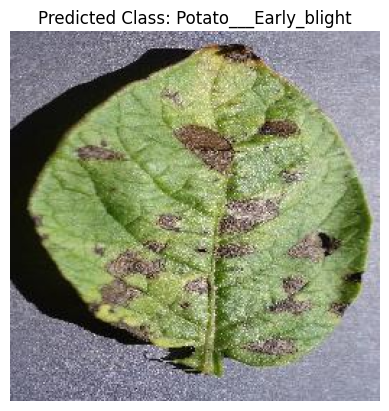

In [ ]:
# Define your pre-trained model and classes_dict
model = load_model('/content/drive/MyDrive/Crop Health Monitoring (Project Code)/Model (1)/crop_health_monitoring_model.h5') # Load your pre-trained model
# Define your class mapping - we have classes_dict for this

path = "/content/test/test/PotatoEarlyBlight2.JPG"

# Call the prediction function
predicted_class = prediction(path, model, classes_dict)

In [ ]:
print(predicted_class)

Potato___Early_blight


1/1 [==============================] - 0s 19ms/step


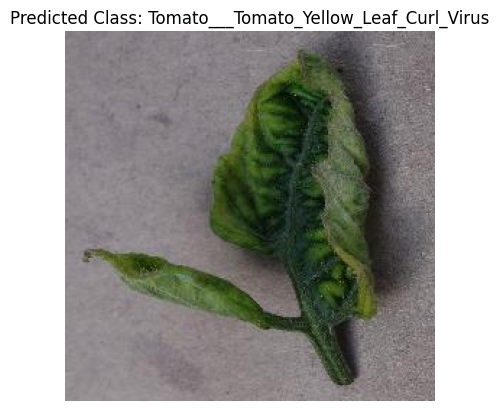

In [ ]:
path1 = "/content/drive/MyDrive/Crop Health Monitoring (Project Code)/Test Dataset/test/test/TomatoYellowCurlVirus3.JPG"

# Call the prediction function
predicted_class = prediction(path1, model, classes_dict)


<hr><hr><hr>